In [2]:
import pandas as pd

data=pd.read_csv('E:\\Naresh IT\\Sample\\winequality_red - winequality_red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [20]:
from sklearn.feature_selection import VarianceThreshold
vt=VarianceThreshold(threshold=2)
vt.fit(data)

VarianceThreshold(threshold=2)

In [21]:
vt.get_support()
cols=data.columns[vt.get_support()]
data[cols]

,fixed acidity,free sulfur dioxide,total sulfur dioxide
0,7.4,11.0,34.0
1,7.8,25.0,67.0
2,7.8,15.0,54.0
3,11.2,17.0,60.0
4,7.4,11.0,34.0
...,...,...,...
1594,6.2,32.0,44.0
1595,5.9,39.0,51.0
1596,6.3,29.0,40.0
1597,5.9,32.0,44.0


In [12]:
data=pd.read_csv('E:\\Naresh IT\\Sample\\winequality_red - winequality_red.csv')

In [4]:
X=data.drop('quality',axis=1)
y=data['quality']

In [25]:
from sklearn.feature_selection import mutual_info_classif
mi=mutual_info_classif(X,y)
mi

array([0.03575712, 0.11825346, 0.05115624, 0.01087997, 0.0234597 ,
       0.04382839, 0.07400306, 0.09390895, 0.03547693, 0.09135886,
       0.18009107])

In [30]:
val=pd.Series(mi)
val.index=X.columns
val.sort_values(ascending=True)

residual sugar          0.010880
chlorides               0.023460
pH                      0.035477
fixed acidity           0.035757
free sulfur dioxide     0.043828
citric acid             0.051156
total sulfur dioxide    0.074003
sulphates               0.091359
density                 0.093909
volatile acidity        0.118253
alcohol                 0.180091
dtype: float64

<Axes: >

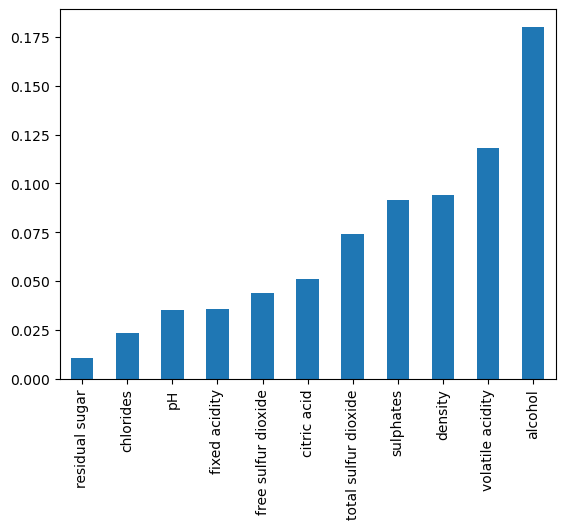

In [31]:
val.sort_values(ascending=True).plot(kind='bar')

In [29]:
from sklearn.feature_selection import SelectKBest,mutual_info_classif
s=SelectKBest
m=mutual_info_classif
top5=s(m,k=1)
val=top5.fit(X,y)
val

SelectKBest(k=1,
            score_func=<function mutual_info_classif at 0x000001EDF08EACB0>)

<Axes: >

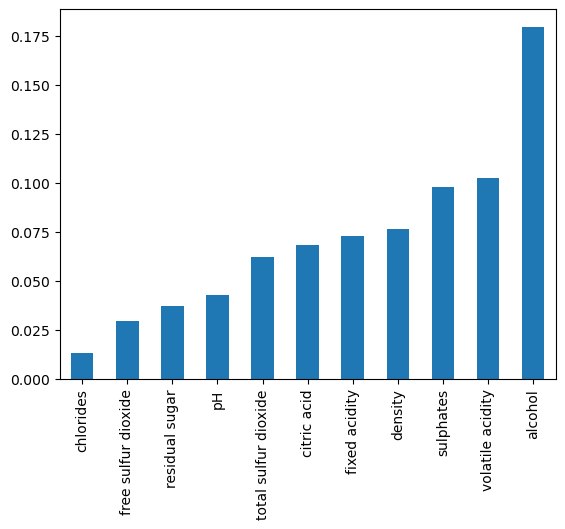

In [30]:
val1=val.scores_
val1=pd.Series(val1)
val1.index=X.columns
val1.sort_values().plot(kind='bar')

In [26]:
import matplotlib.pyplot as plt

In [31]:
val.get_support()

array([False, False, False, False, False, False, False, False, False,
       False,  True])

In [32]:
val.get_feature_names_out()

array(['alcohol'], dtype=object)

In [33]:
val.get_params()

{'k': 1,
 'score_func': <function sklearn.feature_selection._mutual_info.mutual_info_classif(X, y, *, discrete_features='auto', n_neighbors=3, copy=True, random_state=None)>}

In [34]:
val.scores_()

array([0.07273864, 0.10277702, 0.06850328, 0.03724385, 0.01326306,
       0.02972313, 0.06223631, 0.07654808, 0.04270689, 0.09794302,
       0.17970257])